In [1]:
seed_num = 2022

from numpy.random import seed
seed(seed_num)
from tensorflow.random import set_seed
set_seed(seed_num)
import tensorflow as tf
tf.keras.utils.set_random_seed(seed_num)
tf.config.experimental.enable_op_determinism()

import numpy as np
import pandas as pd
import os

import anndata as ad
import scanpy as sc
import seaborn as sns

from keras.models import load_model

import time

from SC2Spa import SI, SVA, Vis, PP

pd.options.display.max_columns = 39
%matplotlib inline

/mnt/win1
/mnt/win1/SC2Spa_Notebook/MOB_Visium


# Spatially Variance Analysis (SVA)

In [2]:
ST = pd.read_csv('MOBRep12_Processed.csv')
loc = pd.read_csv('MOBRep12_loc.csv')[['x', 'y']]

adata = ad.AnnData(X=ST.values, obs = loc, var = pd.DataFrame(ST.columns).set_index(0))
adata.var.index.name = None
adata.var_names_make_unique()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/home/linbuliao/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
print(ST.shape)
ST.head()

(278, 14151)


,Plekha1,Cnih3,Gpc5,Sirt3,Rab8a,Nadk,Tiparp,Fbxo28,Rgl1,Ctsb,Tank,Rnf216,Vps13b,Rapgef1,Rgma,Gnptab,Cuedc1,Sqstm1,Ssna1,...,Myh15,9930014A18Rik,Alx1,4930505A04Rik,Sp110,Tmem74b,Pabpc1l,Kirrel2,Vwc2l,Agr2,Il12a,Dhx37,Rnase1,2310034G01Rik,Pdzk1ip1,Gipr,Dpys,Hapln3,Snora21
0,2.982759,0.596552,0.596552,1.193104,2.982759,0.596552,1.193104,1.789656,0.596552,4.175863,0.596552,1.193104,0.596552,0.596552,0.596552,0.596552,0.596552,2.386208,1.193104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.042753,1.042753,0.000000,1.042753,1.042753,1.042753,0.000000,1.042753,0.000000,9.384776,1.042753,0.000000,0.000000,3.128259,0.000000,1.042753,0.000000,1.042753,1.042753,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.999800,0.000000,0.000000,0.000000,0.000000,0.999800,0.999800,1.999600,3.999200,0.999800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999400,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,1.490313,0.000000,0.000000,2.980626,7.451565,0.000000,0.000000,1.490313,2.980626,0.000000,1.490313,0.000000,2.980626,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.770832,0.000000,0.000000,0.000000,0.770832,0.770832,0.000000,0.770832,0.000000,7.708317,0.770832,0.770832,0.000000,0.000000,0.000000,0.000000,0.000000,3.854159,0.770832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
adata.obs

,x,y
0,16.918,16.996
1,18.017,17.034
2,20.075,17.059
3,18.979,17.065
4,21.937,16.967
...,...,...
273,18.970,26.953
274,27.930,26.890
275,24.114,28.955
276,25.134,28.934


In [6]:
'''
model = SI.Self_Mapping(adata, sparse = False, model_path = None, x_name = 'x',
             y_name = 'y', root = 'Model_SI/', name = 'SI_Overall', l1_reg = 1e-5, l2_reg = 0,
             dropout = 0.05, epoch = 500, batch_size = 16, nodes = [4096, 1024, 256, 64, 16, 4],
             lrr_patience = 20, ES_patience = 50, min_lr = 1e-5, save = True, polar = True, seed = seed_num)
'''
model = SI.Self_Mapping(adata, sparse = False, model_path = 'Model_SI/SI_Overall.h5',
                        x_name = 'x', y_name = 'y')


2022-07-08 19:16:08.115940: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-08 19:16:08.842111: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22040 MB memory:  -> device: 0, name: NVIDIA TITAN RTX, pci bus id: 0000:3b:00.0, compute capability: 7.5


In [7]:
SVA.PrioritizeLPG(adata, Model = model, sparse = False, percent = 0.5, scale_factor = 1e3,
                  Norm = True, x_name = 'x', y_name = 'y')

<keras.layers.core.dense.Dense object at 0x7f5decd12e80> :
(4, 2)
<keras.layers.core.dense.Dense object at 0x7f5decd127f0> :
(16, 4)
<keras.layers.core.dense.Dense object at 0x7f5decd21d00> :
(64, 16)
<keras.layers.core.dense.Dense object at 0x7f5decd27e50> :
(256, 64)
<keras.layers.core.dense.Dense object at 0x7f5decd27760> :
(1024, 256)
<keras.layers.core.dense.Dense object at 0x7f5decd4ac70> :
(4096, 1024)
<keras.layers.core.dense.Dense object at 0x7f5deca9ff10> :
(14151, 4096)


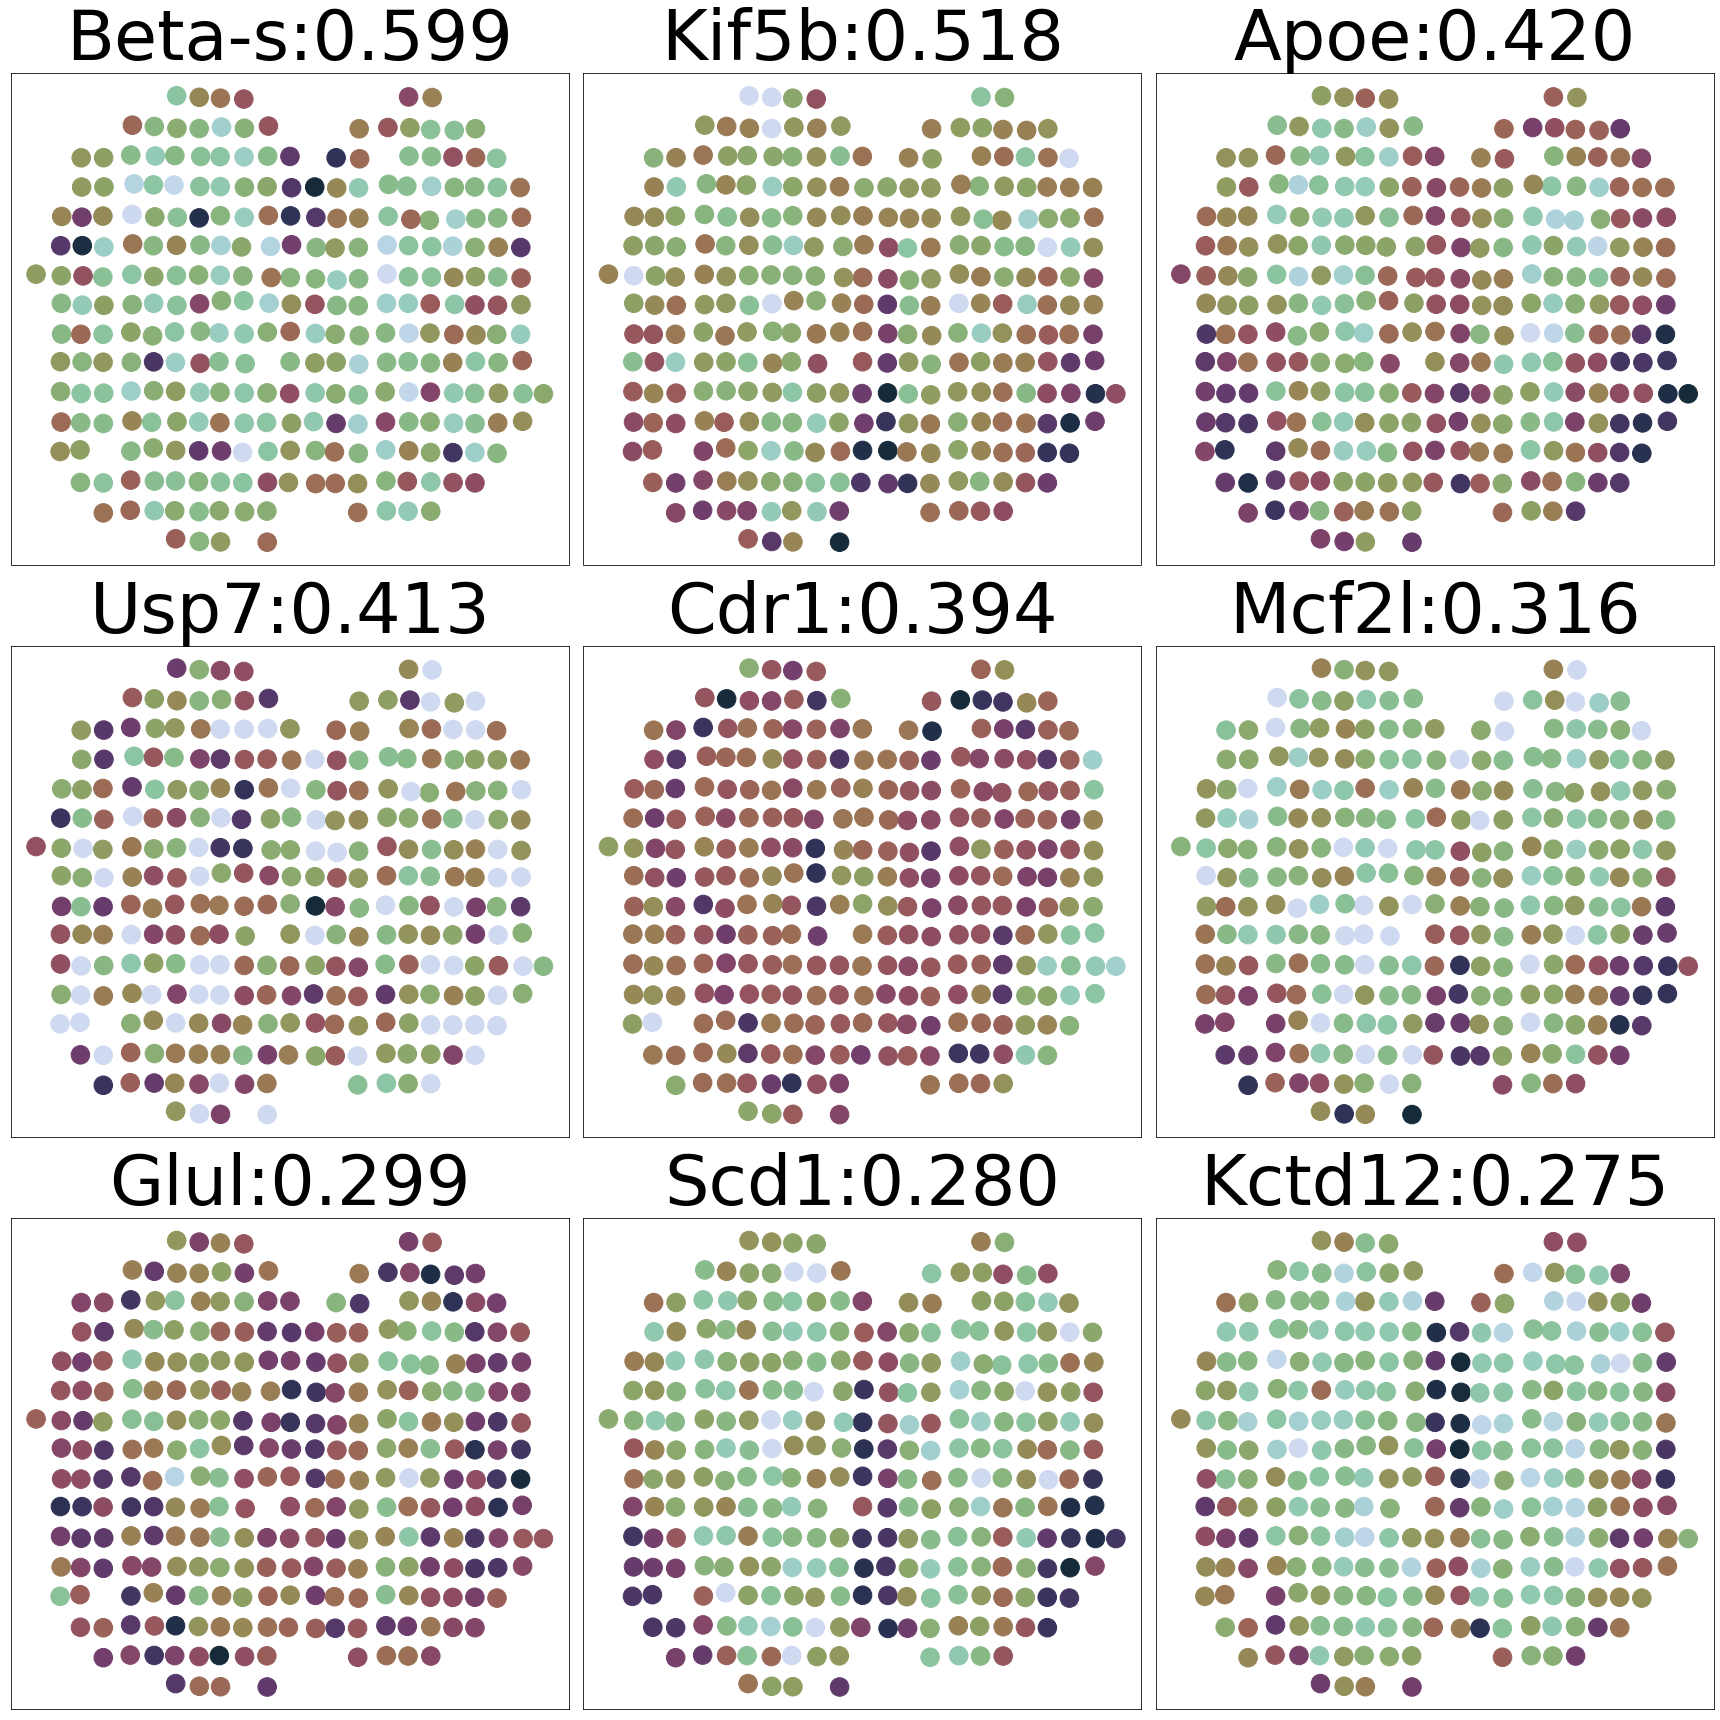

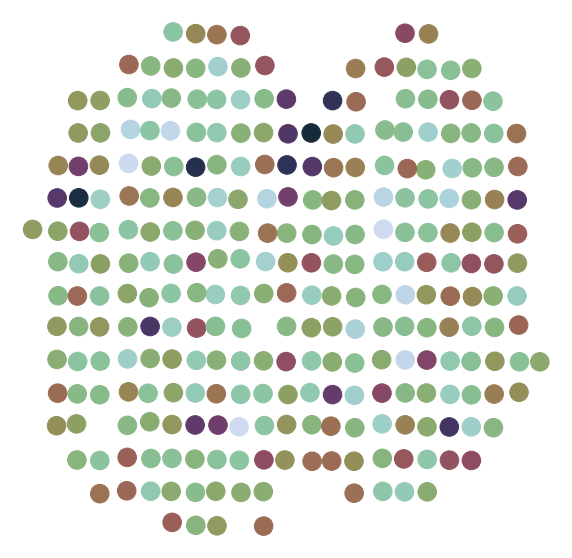

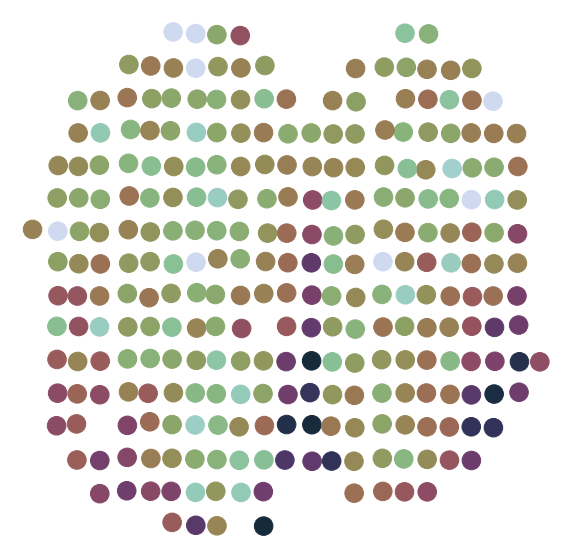

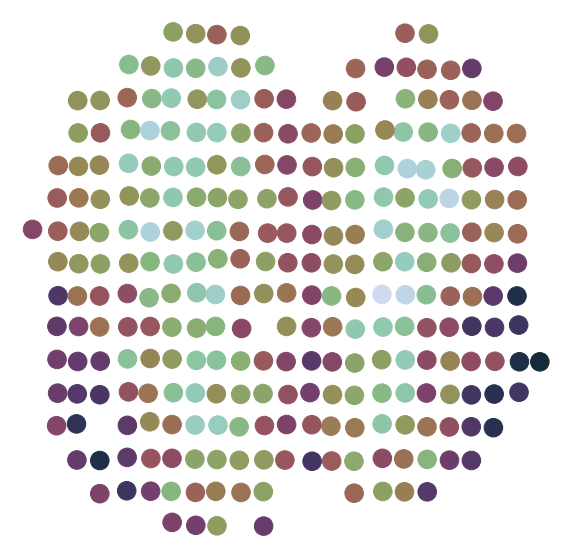

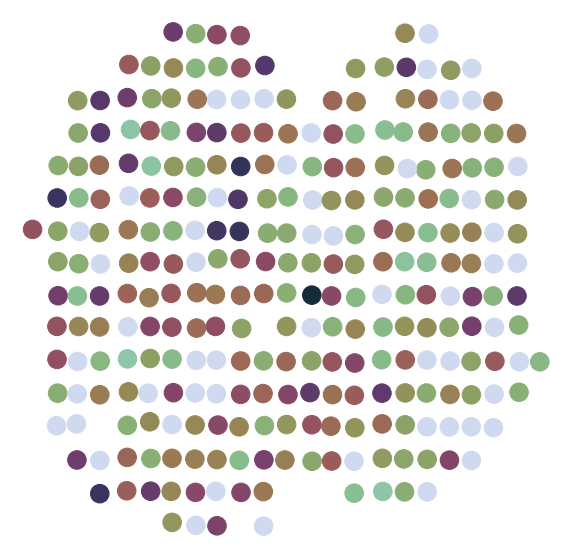

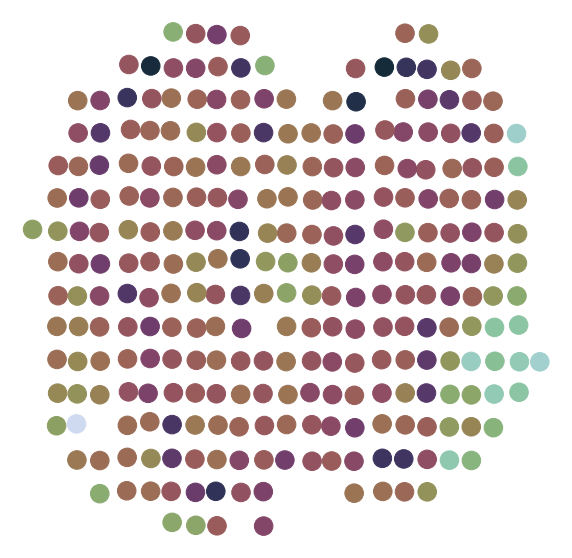

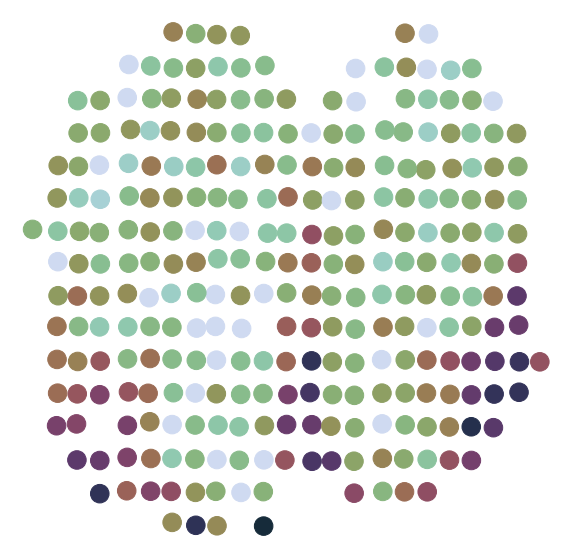

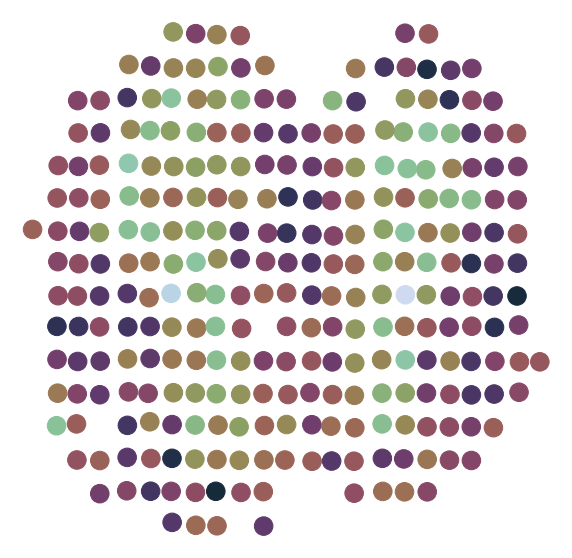

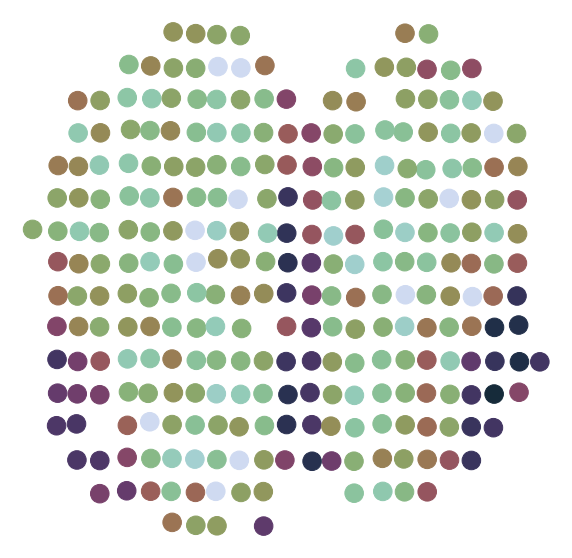

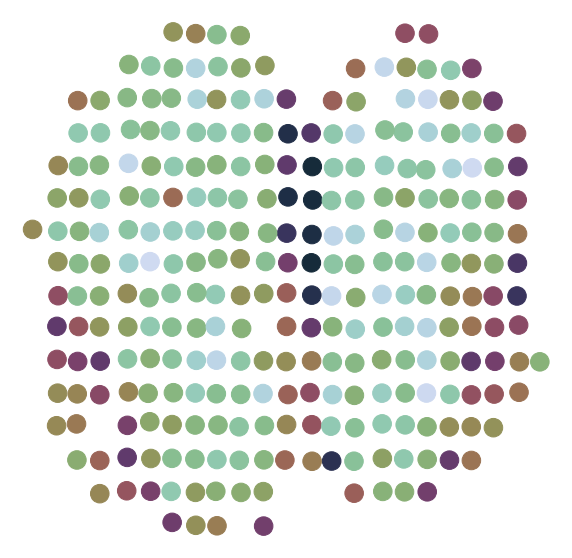

In [25]:
cmap = sns.cubehelix_palette(n_colors = 32,start = 2, rot=1.5, as_cmap = True)

Vis.DrawSVG(adata, adata.var, 'imp_sumup_norm', n_genes = 9, s =  344, cmap = cmap,
            FM = False, root = 'figures/SVG/', fontsize = 70, alpha = 1,
            Bottom = False, x_name = 'x', y_name = 'y', output = 'SlideSeq2FCNNTop_Em1')

In [9]:
adata.var.to_csv('GeneInfo/LPG_MOB.csv')